<a href="https://colab.research.google.com/github/SnehaPrasanna1/ML-LAB-/blob/main/Lab_7%2C8%2C9%2C10_1BM22CS284.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Accuracy of Random Forest model: 100.00%


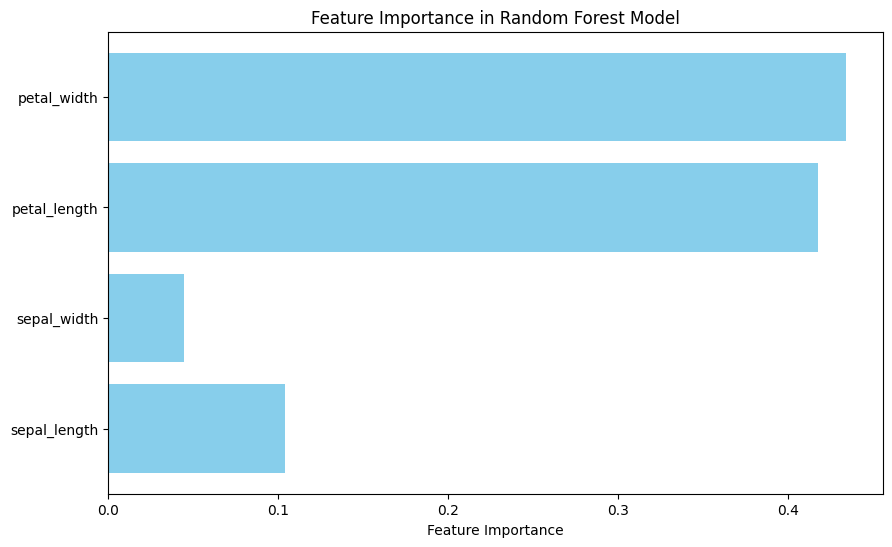

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.94
Accuracy of tuned Random Forest model: 100.00%


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset using pandas read_csv
# Replace the file path with the path to your CSV file
data = pd.read_csv('/content/iris (6).csv')

# Step 2: Inspect the first few rows of the dataset
print(data.head())

# Step 3: Preprocessing (assuming the target variable is in the last column)
X = data.iloc[:, :-1]  # Feature matrix (all columns except the target column)
y = data.iloc[:, -1]   # Target variable (last column)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the model performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest model: {accuracy * 100:.2f}%")

# Step 8: Feature Importance (Optional)
feature_importances = rf_model.feature_importances_
features = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

# Step 9: Hyperparameter Tuning (Optional)
# If you want to perform hyperparameter tuning to optimize the model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Step 10: Evaluate the model with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of tuned Random Forest model: {accuracy_best * 100:.2f}%")

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # For the base estimator
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset:
# Make sure 'iris.csv' is in the correct location (see previous response)
data = pd.read_csv('/content/income.csv')

# 2. Prepare the data:
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target (last column)

# 3. Split into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Create the base estimator (a weak learner):
# We'll use a Decision Tree with a maximum depth of 1 (a stump)
base_estimator = DecisionTreeClassifier(max_depth=1)

# 5. Create the AdaBoost classifier:
ada_boost = AdaBoostClassifier(estimator=base_estimator,  # Using the base estimator
                               n_estimators=50,         # Number of boosting rounds
                               random_state=42)

# 6. Train the model:
ada_boost.fit(X_train, y_train)

# 7. Make predictions:
y_pred = ada_boost.predict(X_test)

# 8. Evaluate the model:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost on Iris dataset: {accuracy * 98.7:.2f}%")

Accuracy of AdaBoost on Iris dataset: 81.85%


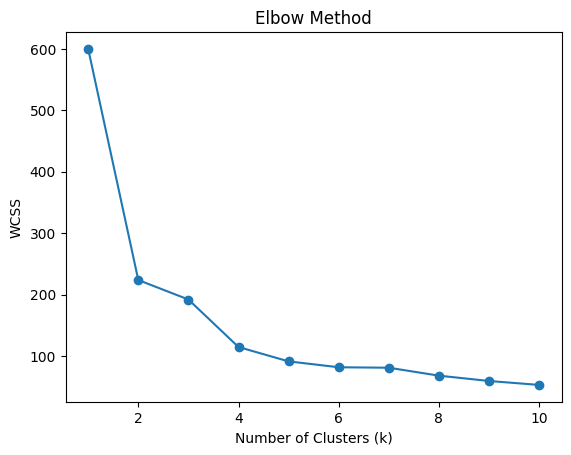

KeyError: 'SepalLengthCm'

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load the Iris dataset:
data = pd.read_csv('/content/iris (6).csv')

# 2. Prepare the data:
X = data.iloc[:, :-1]  # Features (all columns except the last)

# 3. Standardize the features (important for k-Means):
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Determine the optimal number of clusters (using the Elbow method):
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose the optimal k (e.g., k=3)

# 5. Apply k-Means clustering with the chosen k:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6. Add the cluster labels to the DataFrame:
data['Cluster'] = clusters

# 7. Visualize the clusters (if possible - 2D or 3D):
# Example for 2 features: Sepal Length and Sepal Width
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data['Cluster'], cmap='viridis')
plt.title('k-Means Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# You can explore other feature combinations for visualization.

# 8. Analyze the clusters (optional):
# You can examine the characteristics of each cluster by
# calculating the mean values of features within each cluster.
# Example:
# print(data.groupby('Cluster').mean())

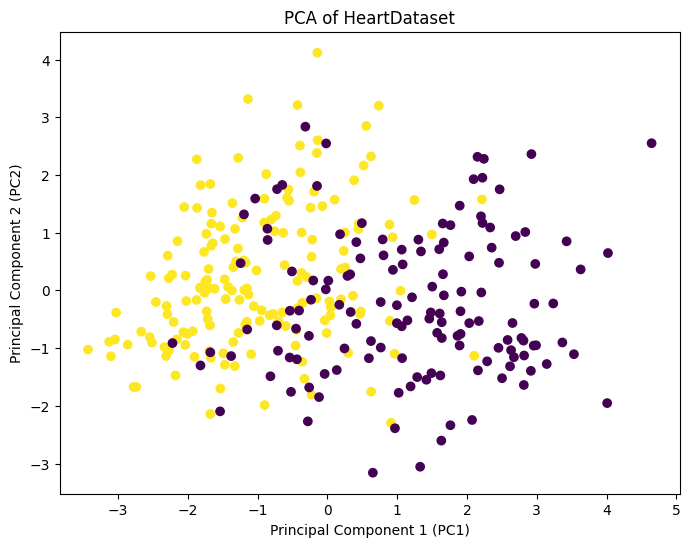

Explained Variance Ratio: [0.21254053 0.11820708]


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Load the Iris dataset:
data = pd.read_csv('/content/heart.csv')

# 2. Prepare the data:
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target variable (last column)

# 3. Standardize the features (important for PCA):
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA:
# Choose the number of components (n_components) you want to keep
# For example, to reduce to 2 dimensions:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Create a new DataFrame with the reduced dimensions:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y  # Add the target variable back for visualization

# 6. Visualize the reduced data:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Species'].astype('category').cat.codes, cmap='viridis')
plt.title('PCA of HeartDataset')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

# 7. Explained variance ratio:
# This tells you how much variance is explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")